## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# All the data for the duplicate mouse

combined_df[combined_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_df = combined_df[combined_df["Mouse ID"] != "g989"]
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

combined_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df = combined_df.groupby("Drug Regimen")

# Statistical variables

grouped_mean = grouped_df["Tumor Volume (mm3)"].mean()
grouped_median = grouped_df["Tumor Volume (mm3)"].median()
grouped_var = grouped_df["Tumor Volume (mm3)"].var()
grouped_std = grouped_df["Tumor Volume (mm3)"].std()
grouped_sem = grouped_df["Tumor Volume (mm3)"].sem()

# Assemble into a dataframe

summary_grouped_df = pd.DataFrame({"Mean":               round(grouped_mean, 2), 
                                   "Median":             round(grouped_median, 2),
                                   "Variance":           round(grouped_var, 2),
                                   "Standard Deviation": round(grouped_std, 2),
                                   "Sampling Error":     round(grouped_sem, 2)
                                   })
summary_grouped_df

,Mean,Median,Variance,Standard Deviation,Sampling Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_df = combined_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean",
                                                                                                       "median",
                                                                                                       "var",
                                                                                                       "std",
                                                                                                       "sem"]).round(2)
# Renaming columns and displaying dataframe

summary_agg_df = summary_agg_df.rename(columns = {"mean":   "Mean",
                                                  "median": "Median",
                                                  "var":    "Variance",
                                                  "std":    "Standard Deviation",
                                                  "sem":    "Sampling Error"})
summary_agg_df

Tumor Volume (mm3)                                     \
                           Mean Median Variance Standard Deviation   
Drug Regimen                                                         
Capomulin                 40.68  41.56    24.95               4.99   
Ceftamin                  52.59  51.78    39.29               6.27   
Infubinol                 52.88  51.82    43.13               6.57   
Ketapril                  55.24  53.70    68.55               8.28   
Naftisol                  54.33  52.51    66.17               8.13   
Placebo                   54.03  52.29    61.17               7.82   
Propriva                  52.32  50.45    43.85               6.62   
Ramicane                  40.22  40.67    23.49               4.85   
Stelasyn                  54.23  52.43    59.45               7.71   
Zoniferol                 53.24  51.82    48.53               6.97   

                             
             Sampling Error  
Drug Regimen                 
Capomulin              0.33  
Ceftamin               0.47  
Infubinol              0.49  
Ketapril               0.60  
Naftisol               0.60  
Placebo                0.58  
Propriva               0.54  
Ramicane               0.32  
Stelasyn               0.57  
Zoniferol              0.52

## Bar and Pie Charts

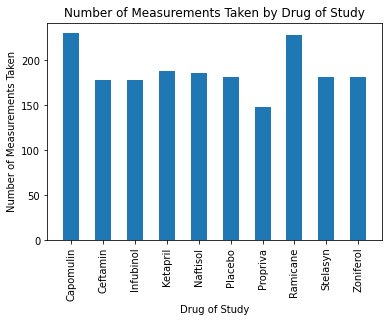

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Measurements Taken List

drug_count = grouped_df["Mouse ID"].count()

# Generate an X-axis to plot and a list to populate with the drug names

drug_list = drug_count.index
x_axis = np.arange(len(drug_count.index))

drug_count.plot(kind = "bar", width = 0.5, align = "center")

# Aesthetic parameters and labels

plt.xlim(-0.75, len(x_axis) - 0.25)
plt.title("Number of Measurements Taken by Drug of Study")
plt.xlabel("Drug of Study")
plt.ylabel("Number of Measurements Taken")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

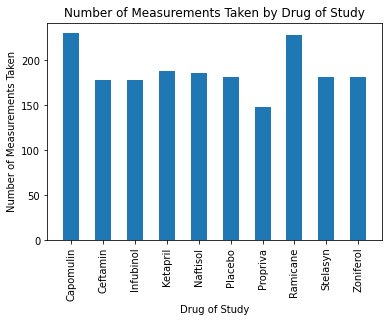

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Construct bar plot

plt.bar(x = x_axis, height = drug_count, width = 0.5, align = "center")

# Aesthetic parameters and labels

plt.xticks(x_axis, drug_list, rotation = 90)
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.title("Number of Measurements Taken by Drug of Study")
plt.xlabel("Drug of Study")
plt.ylabel("Number of Measurements Taken")

plt.show

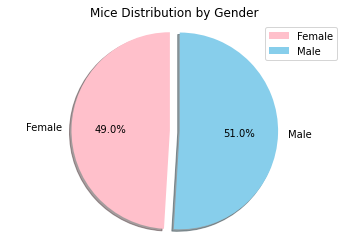

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Break down and count total mice by gender

gender_count = combined_df[["Sex", "Mouse ID"]].groupby("Sex").count()

# Draw plot

gender_count.plot(kind = "pie",
                  y = "Mouse ID",
                  startangle = 90,
                  shadow = True,
                  explode = (0.1, 0),
                  colors = ("pink", "skyblue"),
                  autopct = '%1.1f%%')

# Labels and aesthetics

plt.ylabel("")
plt.title("Mice Distribution by Gender")
plt.axis("equal")
plt.show()

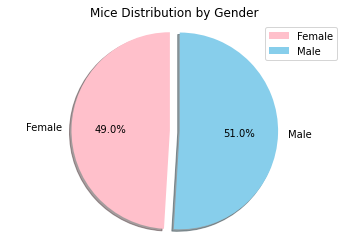

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Draw plot

plt.pie(gender_count["Mouse ID"],
        labels = gender_count.index,
        startangle = 90,
        shadow = True,
        explode = (0.1, 0),
        colors = ("pink", "skyblue"),
        autopct = '%1.1f%%')

# Aesthetics and labels

plt.title("Mice Distribution by Gender")
plt.legend(loc = "upper right")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = combined_df[["Mouse ID", "Timepoint"]].groupby("Mouse ID").max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_df = pd.merge(combined_df, max_timepoint, on = ["Mouse ID", "Timepoint"])

In [95]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Subset the dataframe for the drugs of interest

max_timepoint_df = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"].isin(treatment_list)]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []

max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [103]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_volumes = max_timepoint_df["Tumor Volume (mm3)"].loc[max_timepoint_df["Drug Regimen"] == str(drug)]
   
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    print(f"{drug} treatment max tumor volume quartiles:")
    print(round(quartiles, 2))
    print("---------------------------------------------")
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq - lowerq
    print(f"{drug} treatment max tumor volume IQR: {round(iqr, 2)}")

    lower_bound = lowerq - (1.5 * iqr)
    print(f"{drug} treatment max tumor volume lower outlier boundary: {round(lower_bound, 2)}")
    
    upper_bound = upperq + (1.5 * iqr)
    print(f"{drug} treatment max tumor volume upper outlier boundary: {round(upper_bound, 2)}")

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if len(outliers) > 0:
        print(f"Outliers: {round(outliers, 2)}")
    else:
        print(f"No outliers for {drug}")
        
    print("---------------------------------------------")

Capomulin treatment max tumor volume quartiles:
0.25    32.38
0.50    38.13
0.75    40.16
Name: Tumor Volume (mm3), dtype: float64
---------------------------------------------
Capomulin treatment max tumor volume IQR: 7.78
Capomulin treatment max tumor volume lower outlier boundary: 20.7
Capomulin treatment max tumor volume upper outlier boundary: 51.83
No outliers for Capomulin
---------------------------------------------
Ramicane treatment max tumor volume quartiles:
0.25    31.56
0.50    36.56
0.75    40.66
Name: Tumor Volume (mm3), dtype: float64
---------------------------------------------
Ramicane treatment max tumor volume IQR: 9.1
Ramicane treatment max tumor volume lower outlier boundary: 17.91
Ramicane treatment max tumor volume upper outlier boundary: 54.31
No outliers for Ramicane
---------------------------------------------
Infubinol treatment max tumor volume quartiles:
0.25    54.05
0.50    60.17
0.75    65.53
Name: Tumor Volume (mm3), dtype: float64
----------------

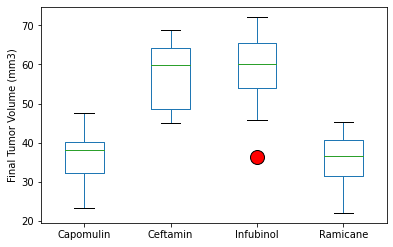

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

max_timepoint_df.boxplot(by = "Drug Regimen", 
                         column = "Tumor Volume (mm3)", 
                         flierprops = {"markerfacecolor": "red", "markersize": 14})

# Properties
plt.grid(False)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")

# Show plot
plt.show()

## Line and Scatter Plots

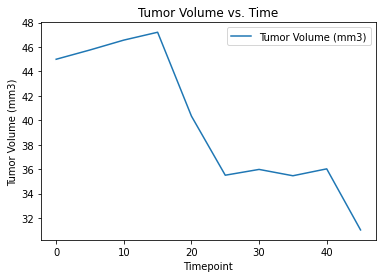

In [119]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Extract a mouse, selected at random, from the mice treated with Capomulin
single_mouse_id = max_timepoint_df["Mouse ID"].loc[max_timepoint_df["Drug Regimen"] == "Capomulin"].sample(1)
combined_df

# Extract timepoint and tumor volume data for that mouse
single_mouse_data = combined_df[["Timepoint", "Tumor Volume (mm3)"]].loc[combined_df["Mouse ID"].isin(single_mouse_id)]
single_mouse_data

# Plot Tumor volume vs. Timepoint
single_mouse_data.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time")
plt.show()

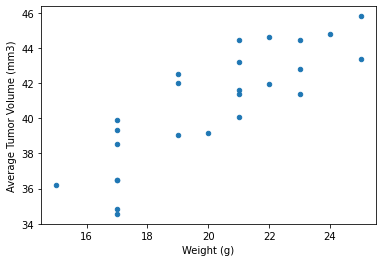

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# First, create a dataframe with average tumor volume and mouse weight for mice on Capomulin
# (weight stays the same for each mouse, so the mean of the weight = mouse weight)

avg_weight = combined_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].loc[combined_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

# Now draw a scatterplot for average tumor volume vs. average weight
avg_weight.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")

# Aesthetics and show plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

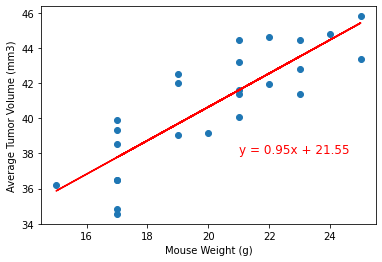

The correlation coefficient is: 0.8419


In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Define the x and y values
x_values = avg_weight["Weight (g)"]
y_values = avg_weight["Tumor Volume (mm3)"]

# Obtain the values to define a linear regression curve, using the linregress function
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Obtain predicted values using the linear regression equation
regress_values = slope * x_values + intercept

# Scatter plot 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", color = "red")

# Annotate line equation
line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_equation, (21, 38), fontsize = 12, color = "red")

# Labels and show plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Our correlation coefficient is rvalue, so we can print it.
print(f"The correlation coefficient is: {round(rvalue, 4)}")

#### Conclusions